In [599]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [600]:
#Reading the dataset
dataset = pd.read_csv("insurance.csv")

In [601]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [602]:
dataset.shape

(1338, 7)

In [603]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [604]:
dataset.duplicated().any()

True

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


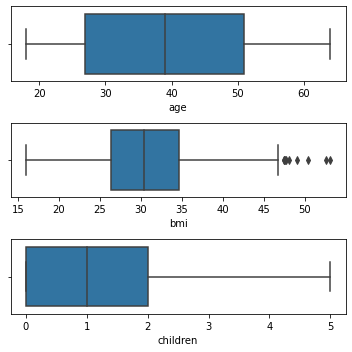

In [605]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(dataset['age'], ax = axs[0])
plt2 = sns.boxplot(dataset['bmi'], ax = axs[1])
plt3 = sns.boxplot(dataset['children'], ax = axs[2])
plt.tight_layout()

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


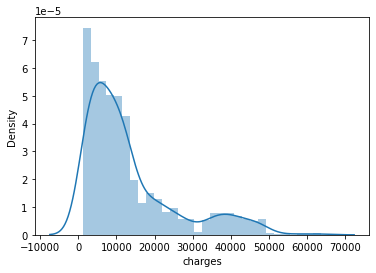

In [606]:
sns.distplot(dataset['charges']);

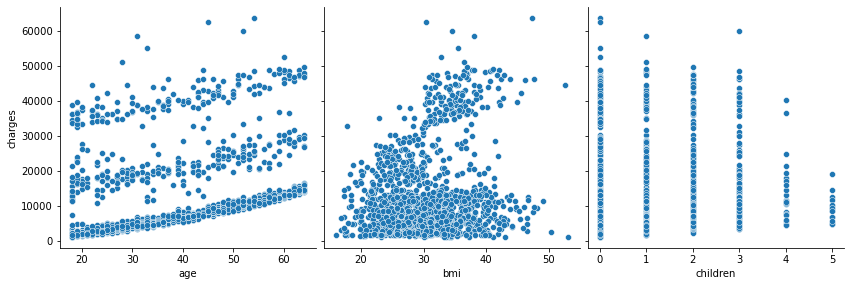

In [607]:
sns.pairplot(dataset, x_vars=['age', 'bmi', 'children'], y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

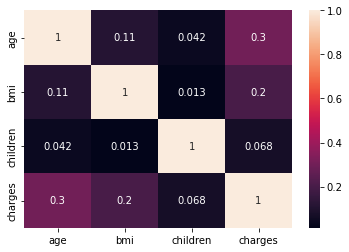

In [608]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [609]:
#Single Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [610]:
#Setting the value for X and Y
x = dataset[['age']]
y = dataset['charges']

In [611]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1, random_state = 250)

In [612]:
slr= LinearRegression()  
slr.fit(x_train, y_train)

LinearRegression()

In [613]:
#Printing the model coefficients
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  3189.2982232769446
Coefficient: [257.24449222]


In [614]:
print('Regression Equation: Charges = 3189.2982232769446 + 257.24449222 * age')

Regression Equation: Charges = 3189.2982232769446 + 257.24449222 * age


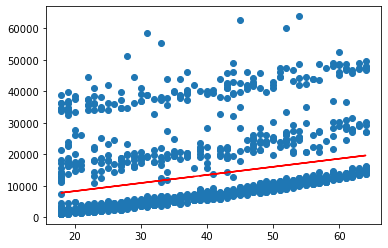

In [615]:
#Line of best fit
plt.scatter(x_train, y_train)
plt.plot(x_train, 3189.2982232769446 + 257.24449222*x_train, 'r')
plt.show()

In [616]:
#Prediction of Test and Training set result  
y_pred_slr= slr.predict(x_test)  
x_pred_slr= slr.predict(x_train)  

In [617]:
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [8076.94357554]


In [618]:
#Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

,Actual value,Predicted value
248,1832.094,8076.943576


In [619]:
#Predict for any value
slr.predict([[56]])

array([17594.98978783])

In [620]:
# print the R-squared value for the model
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f}'.format(slr.score(x,y)*100))

R squared value of the model: 8.94


In [621]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 6244.84957553699
Mean Square Error: 38998146.22108453
Root Mean Square Error: 6244.84957553699


In [622]:
#Multiple Linear Regression
#Setting the value for X and Y
x = dataset[['age', 'bmi', 'children']]
y = dataset['charges']

In [623]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=100)  

In [624]:
mlr= LinearRegression()  
mlr.fit(x_train, y_train) 

LinearRegression()

In [625]:
#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(x, mlr.coef_))

-6524.650328761085


[('age', 249.7861806445647),
 ('bmi', 303.9576039911432),
 ('children', 519.8446080286103)]

In [626]:
#Predicting the Test and Train set result 
y_pred_mlr= mlr.predict(x_test)  
x_pred_mlr= mlr.predict(x_train)  

In [627]:
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 9676.57340336  9867.8860551  12868.84958193  8033.57950569
  5623.63360332 17643.66298656 19021.02882992  7585.93719558
 10697.89641019 20378.19953174 20179.21011122 10036.40237202
 15620.824894    9018.06729344 14415.09204881 13292.07151216
 16459.43897473 18010.34313028 12008.41752356 22875.10820043
 18849.08668747  8173.9409489  11212.82158556 12484.93532057
 18400.25943852 13317.83080329 11240.10042671 20291.6487198
 12763.59747359 18056.50438262 23273.47209149  7220.49291502
 19907.58024803  7616.07569748 13594.81847241 16315.44536232
 13291.45346158 13632.63301961  8707.69568819 19366.25202606
 12827.8924106  17047.26185127 10450.78949898 13392.37752147
  5594.75763094 10262.00093533 10393.78459579  8837.62447345
  7096.38529986 15922.43856321 21817.00088936 12395.31971318
 10223.97956847 12946.95087864 12176.34124732 18864.90261825
 18206.73135751 12210.44628212 13119.02177407 17244.1905384
  8559.03942563  8210.95680675 10797.01748067 14927.28655442
 

In [628]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

,Actual value,Predicted value
12,1826.84300,9676.573403
306,20177.67113,9867.886055
318,7421.19455,12868.849582
815,1877.92940,8033.579506
157,15518.18025,5623.633603
...,...,...
710,1727.54000,9190.653191
1005,4433.38770,11403.412901
389,4618.07990,10212.311047
923,4320.41085,12854.321400


In [629]:
#Predict for any value
mlr.predict([[56, 33, 1]])

array([18013.82132707])

In [630]:
# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))

R squared value of the model: 11.97


In [631]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 8899.594165897634
Mean Square Error: 129209552.77458598
Root Mean Square Error: 11367.037994771812
